In [1]:
#Load IBM library
include("SIRP_IBM_Library.jl")

IBM_animation_fast (generic function with 1 method)

# Auxiliary functions for easy use of library 

In [2]:
function init_model(method_hosts, method_parasites, parameters; fraction=0.75)
    
    I = []
    R = []
    
    P = zeros(x, y)
    
    if method_hosts == "full"
        
        S = 1:x*y
        
    elseif method_hosts == "fraction"
        
        S = sample(1:x*y, Int32(x*y*fraction), replace=false)
        
    else
        
        println("This method is not defined")
        
    end
        
    if method_parasites == "center"
        
        P[Int32(floor(x/2)), Int32(floor(y/2))] = P0
            
    elseif method_parasites == "random"
        
        P[rand(1:x*y)] = P0
        
    else
       
        println("This method is not defined")
        
    end

    S0 = length(S)
    P = vec(P)

    grid = construct_squared_grid(x, Int32)

    params = Parameters{Float32}(parameters, zeros(5))

    vars = Variables{Int32}(S, I, R, P)
    
    println("Model initialised with R_0:", R0(params; S0=x*y/S0))
    
    return grid, params, vars
    
end

R0(params; S0=1.0) = (params.rates[2] * params.rates[4]) / (params.rates[1]*(params.rates[3] + params.rates[4])) * (params.rates[end]/(params.rates[3] + params.rates[end])) 

R0_MF(params; S0=1.0) = params.rates[2] * params.rates[4] / (params.rates[1]*(params.rates[3] + params.rates[4]))

R0_MF (generic function with 1 method)

# Simulate system

Here we show an example on how to simulate the system. The user must choose the number of rows and columns of the grid (x,y), the values for the parameters of the model, the initial conditions, and the maximum time to run, t_end (it is system simulated time, not computation time). Then we run the init_model function to get the initialised variables for grid, params and vars and then we run the IBM(t_end, grid, vars, params) function.

Model initialised with R_0:5.0
 14.590865 seconds (34.70 M allocations: 10.822 GiB, 6.05% gc time, 13.28% compilation time)


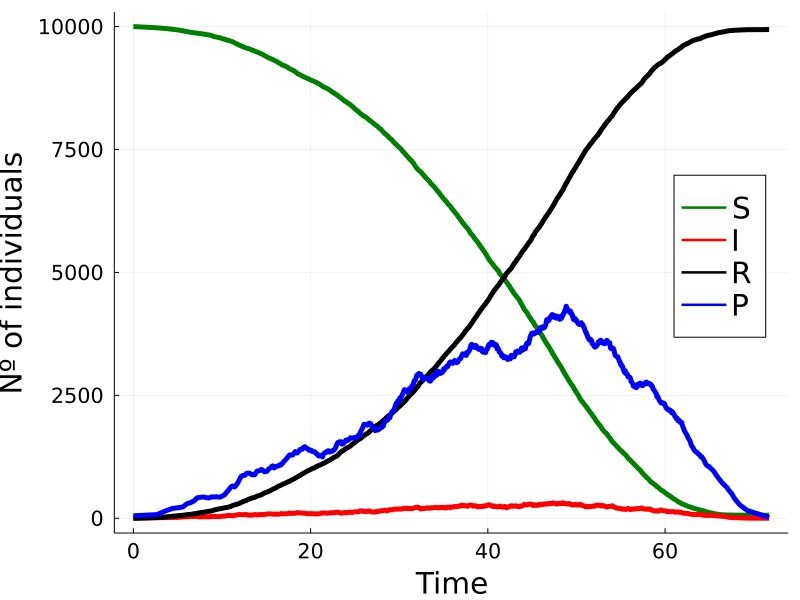

In [3]:
#Choose parameters
x = 100
y = 100

γ = 1.0
λ = 15.0
μ = 1.0
β = 1.0
κ = 2.0

P0 = 50

t_end = 100

parameters = [γ, λ, μ, β, κ]

method_hosts = "full" #full or fraction. if random, the fraction of hosts can be specified (default at 0.75)
method_parasites = "center" #center or random. P0 initialised at center or random cell.

#Initialise the model
grid, params, vars = init_model(method_hosts, method_parasites, parameters; fraction=0.75)

#Simulate
S_f, I_f, R_f, P_f, time = @time IBM(t_end, grid, vars, params);

#We reduce the number of points for plotting
L = length(S_f)

delta = Int(round(L / 1000)) #So we will have 1000 points

S_f_plot = S_f[1:delta:end]
I_f_plot = I_f[1:delta:end]
R_f_plot = R_f[1:delta:end]
P_f_plot = P_f[1:delta:end]

time_plot = time[1:delta:end]

plot(time_plot, [S_f_plot I_f_plot R_f_plot P_f_plot], lw=5, color=["green" "red" "black" "blue"], 
    label=["S" "I" "R" "P"], guidefontsize=20, labelfontsize=20, legendfontsize=20, xlabel="Time", 
    ylabel="Nº of individuals", legend=:right, size=(800, 600), tickfontsize=14)

# Animation 

## "Fast" animation (only hosts are shown)

Here we simulate the system and save an animation showing only the changes in host states, but no parasites are shown

Model initialised with R_0:3.75
 53.820113 seconds (140.98 M allocations: 10.129 GiB, 7.68% gc time, 7.52% compilation time)

Saving animation...
  5.986004 seconds (1.44 M allocations: 79.455 MiB, 9.01% compilation time)


┌ Info: Saved animation to 
│   fn = /home/alex/Pinna Nobilis/Stochastic models/IBM_anim_P_100_L_30_κ_1.0_.gif
└ @ Plots /home/alex/.julia/packages/Plots/Ye1xf/src/animation.jl:114


Plots.AnimatedGif("/home/alex/Pinna Nobilis/Stochastic models/IBM_anim_P_100_L_30_κ_1.0_.gif")
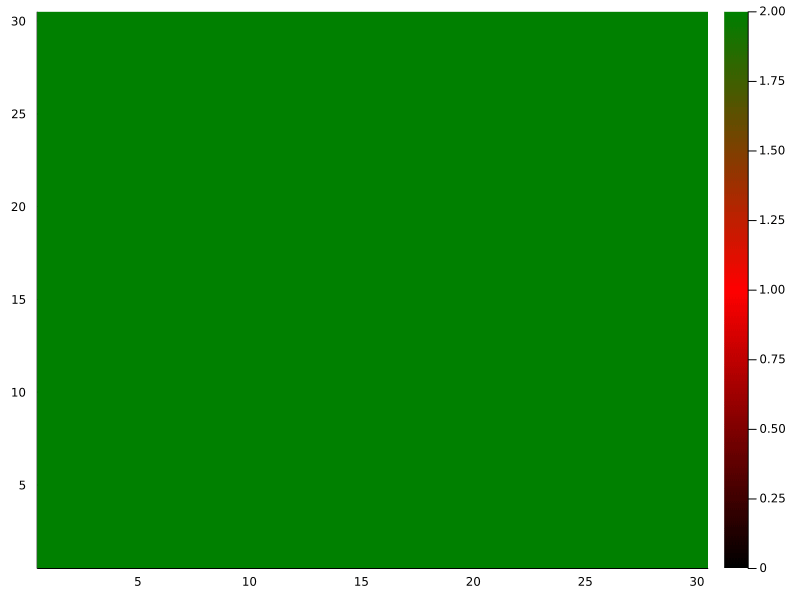

In [4]:
#Choose parameters
x = 30
y = 30

γ = 1.0
λ = 15.0
μ = 1.0
β = 1.0
κ = 1.0

P0 = 100

t_end = 50

parameters = [γ, λ, μ, β, κ]

method_hosts = "full" #full or fraction. if random, the fraction of hosts can be specified (default at 0.75)
method_parasites = "center" #center or random. P0 initialised at center or random cell.

#Initialise the model
grid, params, vars = init_model(method_hosts, method_parasites, parameters; fraction=0.75)

#Simulate the system and save animation
anim = @time IBM_animation_fast(t_end, grid, vars, params; every_frame=100,
    color=cgrad([:black, :red, :green]), size=(800, 600))

println("\nSaving animation...")

name = string("IBM_anim_P_", P0, "_L_", x, "_κ_", params.rates[5], "_.gif")

@time gif(anim, name, fps=100)

## Complete animation

In this animation we show changes in hosts states, parasite spread and population dynamics, but the computational time is larger. 

Model initialised with R_0:3.75
254.217243 seconds (177.24 M allocations: 29.603 GiB, 61.74% gc time, 0.30% compilation time)

Saving animation...
  3.517080 seconds (568 allocations: 43.641 KiB)


┌ Info: Saved animation to 
│   fn = /home/alex/Pinna Nobilis/Stochastic models/IBM_anim_P_100_L_20_κ_1.0_.gif
└ @ Plots /home/alex/.julia/packages/Plots/Ye1xf/src/animation.jl:114


Plots.AnimatedGif("/home/alex/Pinna Nobilis/Stochastic models/IBM_anim_P_100_L_20_κ_1.0_.gif")
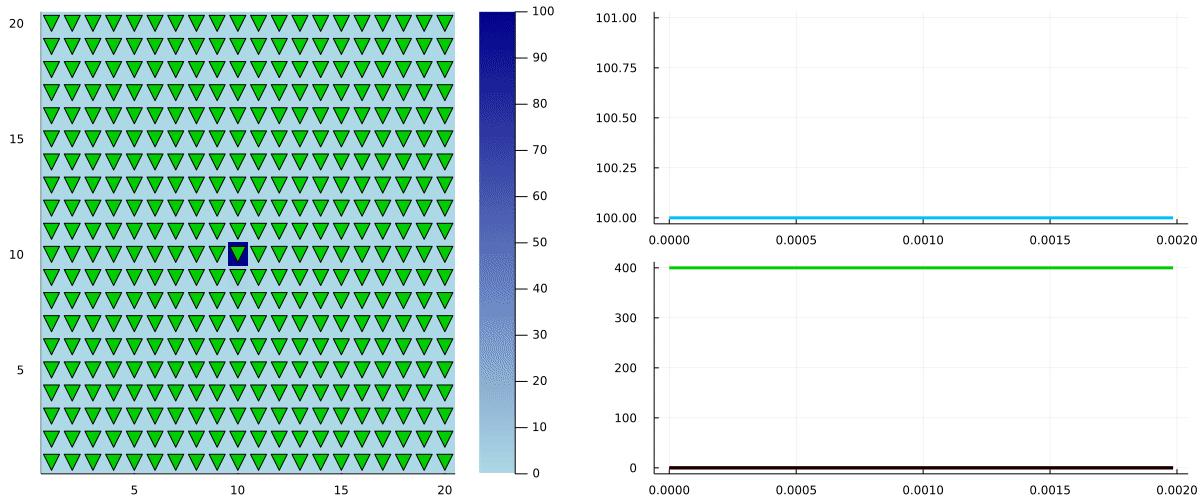

In [5]:
#Choose parameters
x = 20
y = 20

γ = 1.0
λ = 15.0
μ = 1.0
β = 1.0
κ = 1.0

P0 = 100

t_end = 20

parameters = [γ, λ, μ, β, κ]

method_hosts = "full" #full or fraction. if random, the fraction of hosts can be specified (default at 0.75)
method_parasites = "center" #center or random. P0 initialised at center or random cell.

#Initialise the model
grid, params, vars = init_model(method_hosts, method_parasites, parameters; fraction=0.75)

#Simulate the system and save animation
anim = @time IBM_animation(t_end, grid, vars, params; every_frame=100)

println("\nSaving animation...")

name = string("IBM_anim_P_", P0, "_L_", x, "_κ_", params.rates[5], "_.gif")

@time gif(anim, name, fps=100)

## Custom host spatial setting

Also a custom spatial setting for the hosts can be achieved, but this requeres further programming knowledge.

In this example we remove the hosts located at the central rows and columns. Although the parasites can still move tho those sites, we observe that the separation is enough to stop the transmission if we are near the critical point, $R_0\sim1$.

**(The transmission that occurs among the separated zones of the plot is due to periodic boundary conditions, not long range transmission)**

 44.496868 seconds (56.60 M allocations: 4.309 GiB, 52.90% gc time)

Saving animation...
  2.660894 seconds (536 allocations: 42.531 KiB)


┌ Info: Saved animation to 
│   fn = /home/alex/Pinna Nobilis/Stochastic models/IBM_anim_P_200_L_30_κ_1.0_obstacle.gif
└ @ Plots /home/alex/.julia/packages/Plots/Ye1xf/src/animation.jl:114


Plots.AnimatedGif("/home/alex/Pinna Nobilis/Stochastic models/IBM_anim_P_200_L_30_κ_1.0_obstacle.gif")
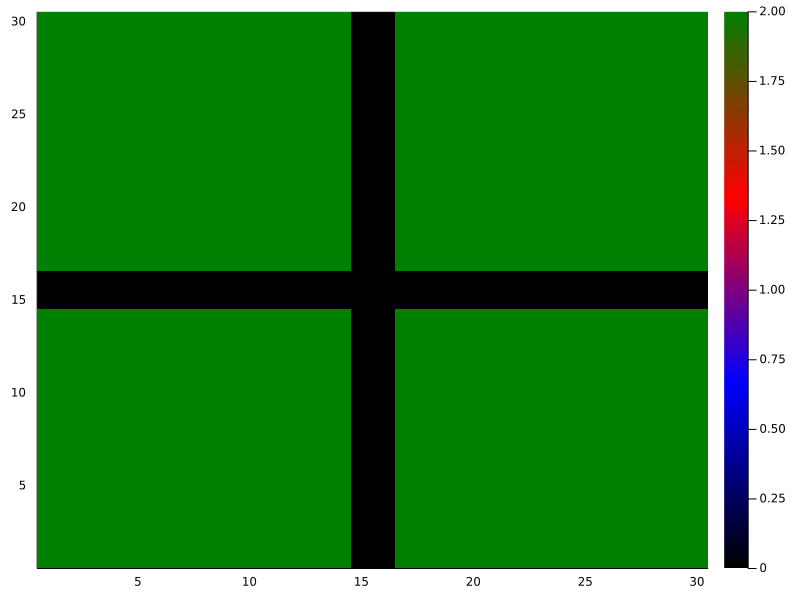

In [13]:
#Choose parameters
x = 30
y = 30

γ = 1.0
λ = 15.0
μ = 1.0
β = 1.0
κ = 1.0

parameters = [γ, λ, μ, β, κ]

P0 = 200

I = []
R = []

P = zeros(x, y)
P[Int32(floor(x/4)), Int32(floor(y/4))] = P0
P = vec(P)

#Custom S0
S0 = zeros(x, y)

forbidden_idx = [15, 16]

for i in 1 : x
    
    for j in 1 : y
        
        if i ∉ forbidden_idx && j ∉ forbidden_idx
            
            S0[i, j] = 1.0
            
        end
        
    end
    
end

S = findall(vec(S0) .> 0)

grid = construct_squared_grid(x, Int32)

params = Parameters{Float32}(parameters, zeros(5))

vars = Variables{Int32}(S, I, R, P);

t_end = 30

anim = @time IBM_animation_fast(t_end, grid, vars, params; every_frame=100, 
    color=cgrad([:black, :blue, :red, :green]), size=(800,600))

println("\nSaving animation...")

name = string("IBM_anim_P_", P0, "_L_", x, "_κ_", params.rates[5], "_obstacle.gif")

@time gif(anim, name, fps = 100)